## Importing Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import wordcloud as wd
import seaborn as sns
sns.set()
import PIL as Pl
from collections import Counter

## Importing Source File

In [28]:
Source_File=pd.read_excel('C:/Users/Aura Tech/Anaconda Project/Assignment/Assignment_Anaconda_Data Files/vgsales.xlsx', index_col=0)
Source_File

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


## Cleaning the Data

#### Detecting Duplicate
Source_File_Dup=Source_File.duplicated()
Source_File_Dup

#### Changing NAN values to 0
Source_File1=Source_File.fillna(0)
Source_File1

## Removing_0_Years

In [ ]:
Cond_No_0=(Source_File1['Year']!=0)
Source_File_N0_0=Source_File1.loc[Cond_No_0]
Source_File_N0_0

## Filtering from Year 1980 to 1999 (20th Century)

In [132]:
###Filtering from 1980-1999
Cond_20thCent=(Source_File_N0_0['Year']< 2000)
Source_File_20cent=Source_File_N0_0.loc[Cond_20thCent]
Source_File_20cent.sample(100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1238,NBA Live 2000,PS,1998.0,Sports,Electronic Arts,1.43,0.05,0.00,0.03,1.52
6675,Marie no Atelier: Salburg no Renkinjutsushi,PS,1997.0,Role-Playing,Gust,0.00,0.00,0.23,0.02,0.25
1753,Mega Man X,SNES,1993.0,Platform,Capcom,0.57,0.08,0.50,0.01,1.16
7122,Tetris Attack,GB,1996.0,Puzzle,Nintendo,0.00,0.00,0.23,0.00,0.23
5019,Ninja: Shadow of Darkness,PS,1998.0,Action,Eidos Interactive,0.21,0.14,0.00,0.02,0.38
...,...,...,...,...,...,...,...,...,...,...
7421,Bastard!! Utsuro Naru Kamigami no Utsuwa,PS,1996.0,Role-Playing,Seta Corporation,0.00,0.00,0.20,0.01,0.21
4727,Command & Conquer: Red Alert,PS,1997.0,Strategy,Virgin Interactive,0.23,0.16,0.00,0.03,0.41
2421,Madden Football 64,N64,1997.0,Sports,Electronic Arts,0.81,0.04,0.00,0.01,0.86


## FInding the 4 Most Popular Platform in the 20th Century

In [64]:
Platform_dict20=dict(Counter(Source_File_20cent['Platform']).most_common(4))
Platform_dict20

{'PS': 916, 'N64': 246, 'SNES': 239, 'SAT': 173}

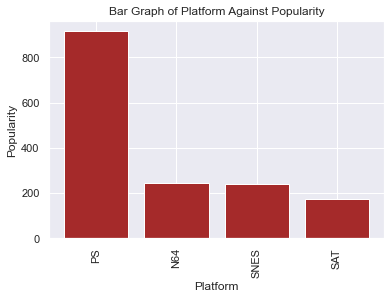

In [237]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Platform_dict20.keys(), Platform_dict20.values(), color='Brown')

#Providing Legends and Titles
plt.title('Bar Graph of Platform Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Platform')

#Preventing X-labels Overlap
plt.xticks(rotation=90)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Platform)

In [35]:
Platform_grp=Source_File_20cent.groupby(['Platform'])
Platform_Average_Global=(dict(Platform_grp['Global_Sales'].mean().nlargest(5)))
Platform_Average_Global

{'GB': 3.2202857142857146,
 'NES': 2.561938775510204,
 'PC': 1.251,
 'GEN': 1.0503703703703704,
 'SNES': 0.8370292887029289}

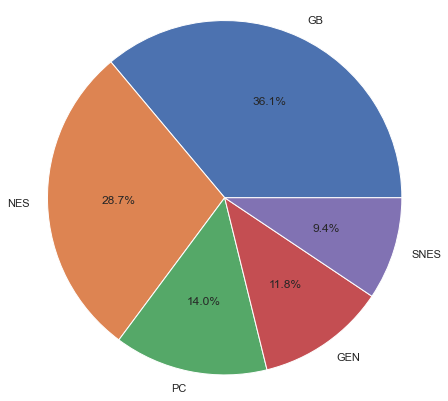

In [36]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Platform_Average_Global.values(), labels=Platform_Average_Global.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## FInding the 4 Most Popular Publisher in the 20th Century

In [189]:
Publisher_dict20=dict(Counter(Source_File_20cent['Publisher']).most_common(4))
Publisher_dict20

{'Nintendo': 171,
 'Sony Computer Entertainment': 155,
 'Konami Digital Entertainment': 125,
 'Sega': 116}

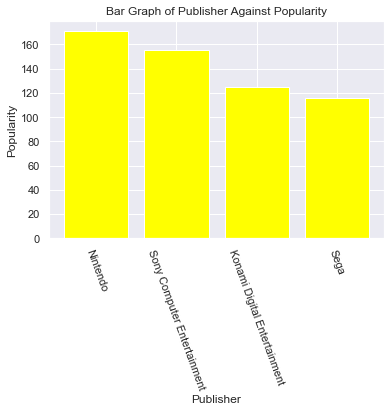

In [204]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Publisher_dict.keys(), Publisher_dict.values(), color='Yellow')

#Providing Legends and Titles
plt.title('Bar Graph of Publisher Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Publisher')

#Preventing X-labels Overlap
plt.xticks(rotation=290)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Publisher)

In [398]:
Publisher_grp=Source_File_20cent.groupby(['Publisher'])
Publisher_Average_Global=(dict(Publisher_grp['Global_Sales'].mean(5).nlargest(5)))
Publisher_Average_Global

{'UEP Systems': 2.25,
 'SquareSoft': 1.2875999999999999,
 'Enix Corporation': 1.2866666666666666,
 'Eidos Interactive': 1.2517857142857143,
 'Maxis': 1.22}

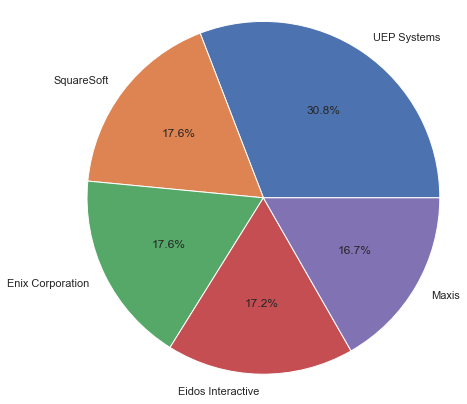

In [400]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Publisher_Average_Global.values(), labels=Publisher_Average_Global.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## FInding the 4 Most Popular Genre in the 20th Century

In [197]:
Genre_dict20=dict(Counter(Source_File_20cent['Genre']).most_common(4))
Genre_dict20

{'Sports': 327, 'Action': 228, 'Fighting': 197, 'Racing': 191}

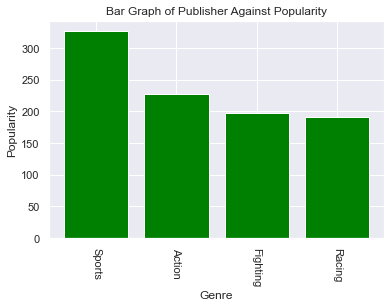

In [205]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Genre_dict.keys(), Genre_dict.values(), color='Green')

#Providing Legends and Titles
plt.title('Bar Graph of Publisher Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Genre')

#Preventing X-labels Overlap
plt.xticks(rotation=270)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Genre)

In [50]:
Genre_grp=Source_File_20cent.groupby(['Genre'])
Genre_Average_Global=(dict(Genre_grp['Global_Sales'].mean().nlargest(5)))
Genre_Average_Global

{'Platform': 2.096075949367089,
 'Puzzle': 1.1302222222222222,
 'Role-Playing': 1.1037016574585636,
 'Racing': 0.8507853403141361,
 'Action': 0.8353947368421053}

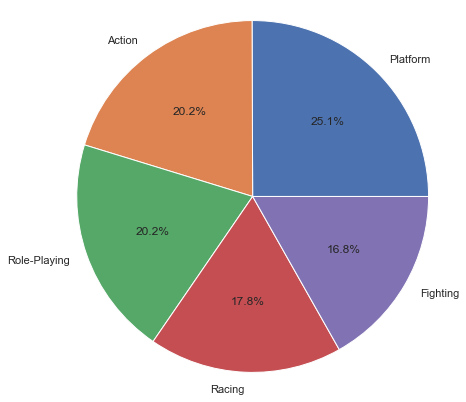

In [402]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Genre_Average_Global.values(), labels=Genre_Average_Global.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## Filtering from Year 2000 to 2020 (21st Century)

In [105]:
Cond_21Cent=(Source_File_N0_0['Year']> 1999)
Source_File_21cent=Source_File_N0_0.loc[Cond_21Cent]

Source_File_21cent.sample(100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
13096,Rave Master,GC,2002.0,Fighting,Konami Digital Entertainment,0.00,0.00,0.05,0.00,0.05
9067,Record of Agarest War 2,PS3,2010.0,Role-Playing,Compile Heart,0.09,0.00,0.04,0.01,0.14
3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,0,0.46,0.17,0.00,0.01,0.64
13362,River City Soccer Hooligans,DS,2010.0,Sports,Arc System Works,0.04,0.00,0.01,0.00,0.05
7584,Cars,XB,2006.0,Racing,THQ,0.15,0.04,0.00,0.01,0.20
...,...,...,...,...,...,...,...,...,...,...
12288,Ikki Tousen: Xross Impact,PSP,2010.0,Action,Marvelous Interactive,0.00,0.00,0.06,0.00,0.06
9778,Tenchu: Shadow Assassins,PSP,2009.0,Action,Ubisoft,0.03,0.03,0.05,0.01,0.12
16324,Jam Sessions: Sing and Play Guitar (jp sales),DS,2007.0,Misc,Ubisoft,0.00,0.00,0.01,0.00,0.01


## FInding the 4 Most Popular Platform in the 20th Century

In [118]:
Platform_dict21 =dict(Counter(Source_File_21cent['Platform']).most_common(4))
Platform_dict21

{'DS': 2132, 'PS2': 2127, 'PS3': 1304, 'Wii': 1290}

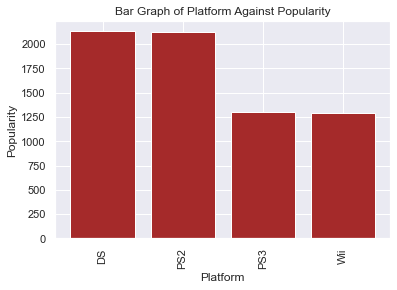

In [109]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Platform_dict21.keys(), Platform_dict21.values(), color='Brown')

#Providing Legends and Titles
plt.title('Bar Graph of Platform Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Platform')

#Preventing X-labels Overlap
plt.xticks(rotation=90)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Platform)

In [119]:
Platform_grp=Source_File_21cent.groupby(['Platform'])
Platform_Average_Global=(dict(Platform_grp['Global_Sales'].mean().nlargest(5)))
Platform_Average_Global

{'GB': 1.0740740740740742,
 'PS4': 0.8276785714285715,
 'X360': 0.7851093117408907,
 'PS3': 0.7280291411042945,
 'Wii': 0.7052790697674418}

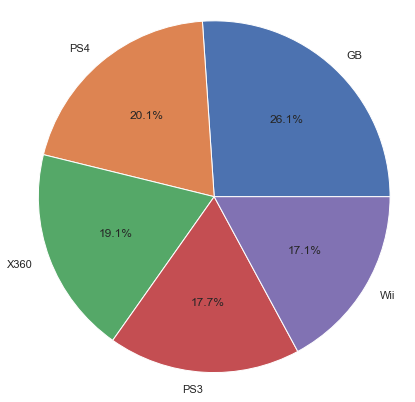

In [120]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Platform_Average_Global.values(), labels=Platform_Average_Global.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## Finding the 4 Most Popular Genre in the 21st Century

In [121]:
Genre_dict21=dict(Counter(Source_File_21cent['Genre']).most_common(4))
Genre_dict21

{'Action': 3025, 'Sports': 1977, 'Misc': 1586, 'Role-Playing': 1290}

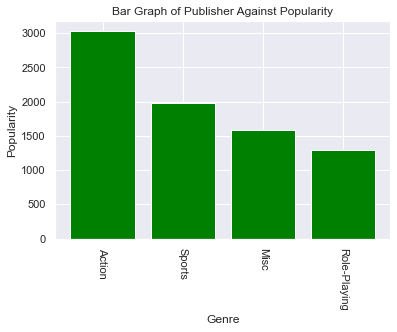

In [122]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Genre_dict21.keys(), Genre_dict21.values(), color='Green')

#Providing Legends and Titles
plt.title('Bar Graph of Publisher Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Genre')

#Preventing X-labels Overlap
plt.xticks(rotation=270)

#Preventing Extra_Information
plt.show()

## Highest_Average_Global_Sales(Genre)

In [123]:
Genre_grp21=Source_File_21cent.groupby(['Genre'])
Genre_Average_Global21=(dict(Genre_grp21['Global_Sales'].mean().nlargest(5)))
Genre_Average_Global21

{'Shooter': 0.8048968609865471,
 'Platform': 0.6935515320334262,
 'Sports': 0.571770359129995,
 'Role-Playing': 0.5612945736434108,
 'Racing': 0.5451884057971015}

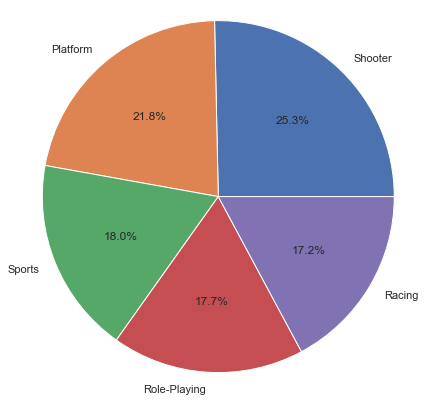

In [124]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Genre_Average_Global21.values(), labels=Genre_Average_Global21.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## FInding the 4 Most Popular Publisher in the 20th Century

In [125]:
Publisher_dict21=dict(Counter(Source_File_21cent['Publisher']).most_common(4))
Publisher_dict21

{'Electronic Arts': 1231,
 'Activision': 910,
 'Ubisoft': 899,
 'Namco Bandai Games': 840}

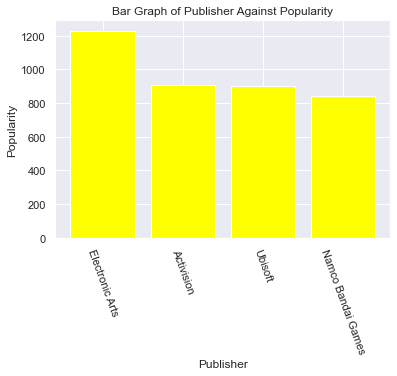

In [126]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Publisher_dict21.keys(), Publisher_dict21.values(), color='Yellow')

#Providing Legends and Titles
plt.title('Bar Graph of Publisher Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Publisher')

#Preventing X-labels Overlap
plt.xticks(rotation=290)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Publisher)

In [127]:
Publisher_grp21=Source_File_21cent.groupby(['Publisher'])
Publisher_Average_Global21=(dict(Publisher_grp21['Global_Sales'].mean(5).nlargest(5)))
Publisher_Average_Global21

{'Nintendo': 2.257047619047619,
 'RedOctane': 2.17,
 'Valve': 1.74,
 'Hello Games': 1.6,
 'Sony Computer Entertainment Europe': 1.5926666666666667}

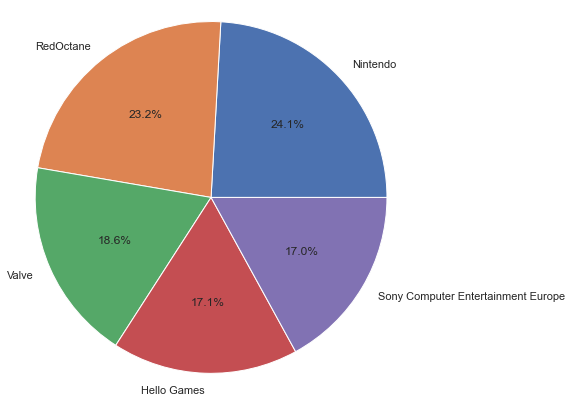

In [128]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Publisher_Average_Global21.values(), labels=Publisher_Average_Global21.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## Filtering only 0 Years

In [135]:
Cond_0=(Source_File1['Year'] ==0)
Source_File_0=Source_File1.loc[Cond_0]
Source_File_0

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,0.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,0.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,0.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,0,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,0.0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16310,Freaky Flyers,GC,0.0,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16330,Inversion,PC,0.0,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16369,Hakuouki: Shinsengumi Kitan,PS3,0.0,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01


## FInding the 4 Most Popular Platform in Unknown Years

In [142]:
Platform_dict0 =dict(Counter(Source_File_0['Platform']).most_common(4))
Platform_dict0

{'Wii': 35, 'PS2': 34, 'X360': 30, 'DS': 30}

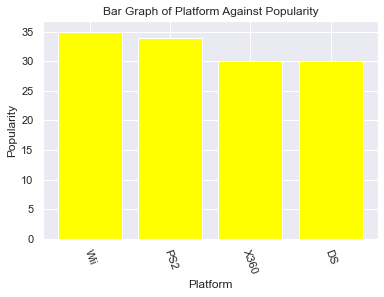

In [153]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Platform_dict0.keys(), Platform_dict0.values(), color='Yellow')

#Providing Legends and Titles
plt.title('Bar Graph of Platform Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Platform')

#Preventing X-labels Overlap
plt.xticks(rotation=290)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Platform)

In [147]:
Platform_grp0=Source_File_0.groupby(['Platform'])
Platform_Average_Global0=(dict(Platform_grp0['Global_Sales'].mean().nlargest(5)))
Platform_Average_Global0

{'GB': 1.03,
 'PS2': 0.6523529411764706,
 2600: 0.618235294117647,
 'Wii': 0.4828571428571428,
 'PS': 0.46714285714285714}

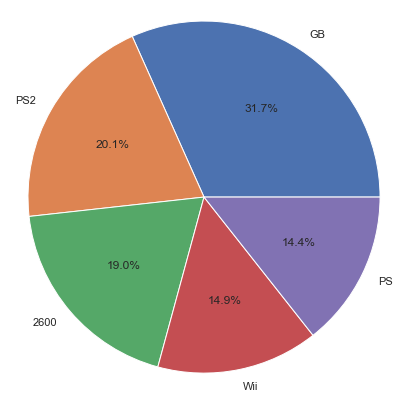

In [157]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Platform_Average_Global0.values(), labels=Platform_Average_Global0.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## FInding the 4 Most Popular Publisher in Unknown Years

In [224]:
Publisher_dict0 =dict(Counter(Source_File_0['Publisher']).most_common(4))
Publisher_dict0

{'Unknown': 103,
 0: 22,
 'Atari': 16,
 'Warner Bros. Interactive Entertainment': 15}

TypeError: 'value' must be an instance of str or bytes, not a int

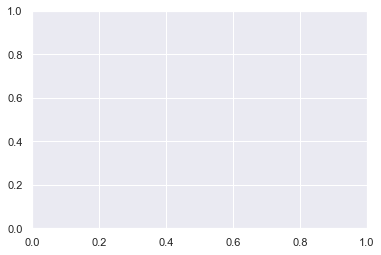

In [214]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Publisher_dict0.keys(), Publisher_dict0.values(), color='Red')

#Providing Legends and Titles
plt.title('Bar Graph of Publisher Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Publisher')

#Preventing X-labels Overlap
plt.xticks(rotation=290)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Publisher)

In [148]:
Publisher_grp0=Source_File_0.groupby(['Publisher'])
Publisher_Average_Global0=(dict(Publisher_grp0['Global_Sales'].mean().nlargest(5)))
Publisher_Average_Global0

{'LucasArts': 2.39,
 'MTV Games': 2.11,
 'Electronic Arts': 1.4108333333333334,
 'Eidos Interactive': 1.115,
 'Warner Bros. Interactive Entertainment': 0.77}

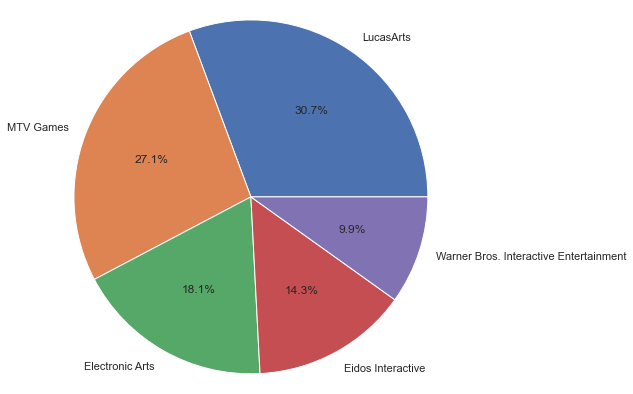

In [150]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Publisher_Average_Global0.values(), labels=Publisher_Average_Global0.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## FInding the 4 Most Popular Genre in Unknown Years

In [138]:
Genre_dict0 =dict(Counter(Source_File_0['Genre']).most_common(4))
Genre_dict0

{'Action': 63, 'Sports': 42, 'Misc': 29, 'Shooter': 28}

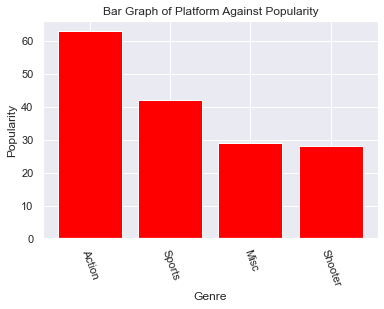

In [161]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Genre_dict0.keys(), Genre_dict0.values(), color='Red')

#Providing Legends and Titles
plt.title('Bar Graph of Genre Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Genre')

#Preventing X-labels Overlap
plt.xticks(rotation=290)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Genre)

In [149]:
Genre_grp0=Source_File_0.groupby(['Genre'])
Genre_Average_Global0=(dict(Genre_grp0['Global_Sales'].mean().nlargest(5)))
Genre_Average_Global0

{'Sports': 0.5164285714285715,
 'Action': 0.4492063492063492,
 'Misc': 0.42551724137931035,
 'Adventure': 0.42400000000000004,
 'Fighting': 0.405}

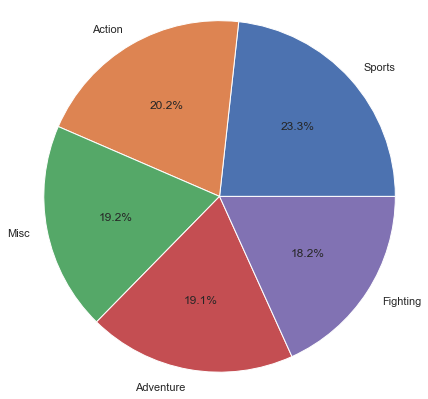

In [151]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Genre_Average_Global0.values(), labels=Genre_Average_Global0.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()